In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('/kaggle/input/karnataka-assembly-result-2023-dataset/karnatak_assembly_election_2023.xlsx')
#df = pd.read_csv("karnataka_election.csv")

In [4]:
df.shape

(224, 7)

In [5]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
0,Afzalpur,34,M.Y.PATIL,Indian National Congress,NITIN VENKAYYA GUTTEDAR,Independent,4594
1,Aland,46,Bhojaraj,Indian National Congress,Subhash Guttedar,Bharatiya Janata Party,10348
2,Anekal,177,B. SHIVANNA,Indian National Congress,SRINIVAS. C. HULLAHALLI,Bharatiya Janata Party,31325
3,Arabhavi,8,BALACHANDRA LAXMANRAO JARKIHOLI,Bharatiya Janata Party,BHIMAPPA GUNDAPPA GADAD,Independent,71540
4,Arkalgud,198,A. MANJU,Janata Dal (Secular),M.T. KRISHNEGOWDA,Independent,19605


In [6]:
df.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
219,Yelahanka,150,S R VISHWANATH,Bharatiya Janata Party,KESHAVA RAJANNA B,Indian National Congress,64110
220,Yelburga,63,BASAVARAJ RAYAREDDI,Indian National Congress,ACHAR HALAPPA BASAPPA,Bharatiya Janata Party,17181
221,Yellapur,81,ARABAIL HEBBAR SHIVARAM,Bharatiya Janata Party,ANDALAGI VEERABHADRAGOUDA SHIVANAGOUD PATIL,Indian National Congress,4004
222,Yemkanmardi,10,SATISH LAXMANARAO JARKIHOLI,Indian National Congress,BASAVARAJ HUNDRI,Bharatiya Janata Party,57211
223,Yeshvanthapura,153,S.T. SOMASHEKAR,Bharatiya Janata Party,T.N.JAVARAYI GOWDA,Janata Dal (Secular),15118


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        224 non-null    object
 1   Const. No.          224 non-null    int64 
 2   Leading Candidate   224 non-null    object
 3   Leading Party       224 non-null    object
 4   Trailing Candidate  224 non-null    object
 5   Trailing Party      224 non-null    object
 6   Margin              224 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.4+ KB


In [8]:
df.describe()

,Const. No.,Margin
count,224.000000,224.000000
mean,112.500000,20944.397321
std,64.807407,17839.688316
min,1.000000,105.000000
25%,56.750000,7842.500000
50%,112.500000,15968.500000
75%,168.250000,30774.500000
max,224.000000,122392.000000


In [9]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
dtype: int64

In [10]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin'],
      dtype='object')

# a) . Get unique party from Leading Party column

In [11]:
df['Leading Party'].unique()

array(['Indian National Congress', 'Bharatiya Janata Party',
       'Janata Dal (Secular)', 'Kalyana Rajya Pragathi Paksha',
       'Independent', 'Sarvodaya Karnataka Paksha'], dtype=object)

# b) . Count no of times a particular party occur in Leading Party column

In [12]:
df['Leading Party'].value_counts()

Leading Party
Indian National Congress         136
Bharatiya Janata Party            65
Janata Dal (Secular)              19
Independent                        2
Kalyana Rajya Pragathi Paksha      1
Sarvodaya Karnataka Paksha         1
Name: count, dtype: int64

# c) . Distribution of leading candidate by Leading Party 

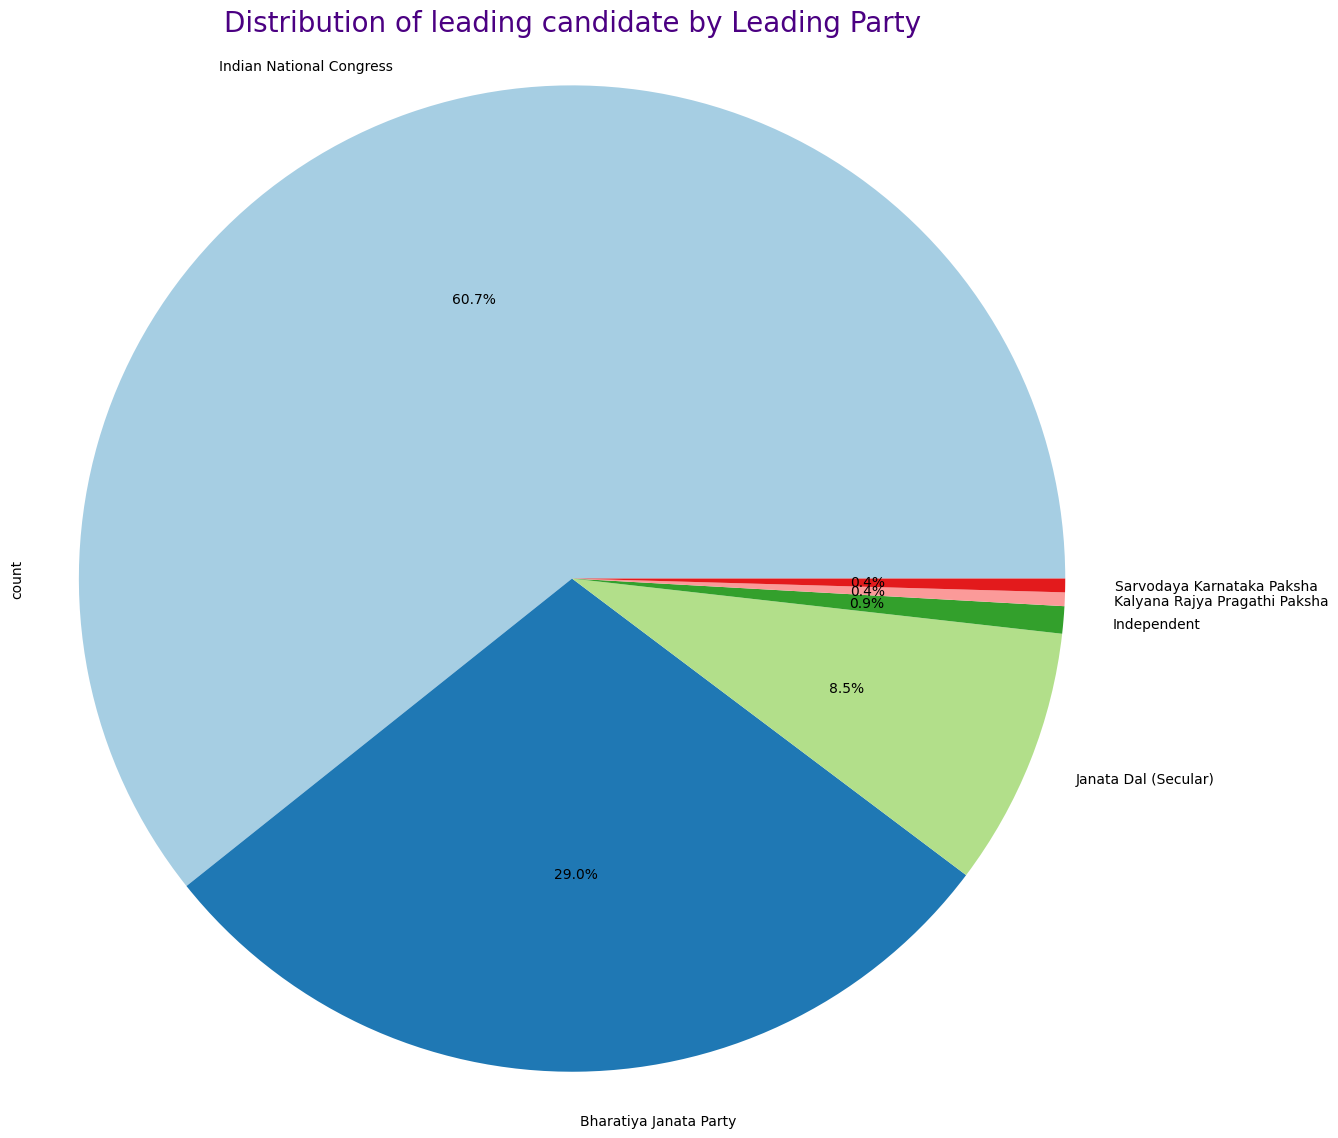

In [13]:
leading_candidate_distribution_by_leading_party = df['Leading Party'].value_counts()
plt.figure(figsize=(14,14))
leading_candidate_distribution_by_leading_party.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of leading candidate by Leading Party',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# d) . Count of Leading candidate from each Party using countplot (seaborn)

Text(0.5, 1.0, 'Count of Leading candidate from each Party')

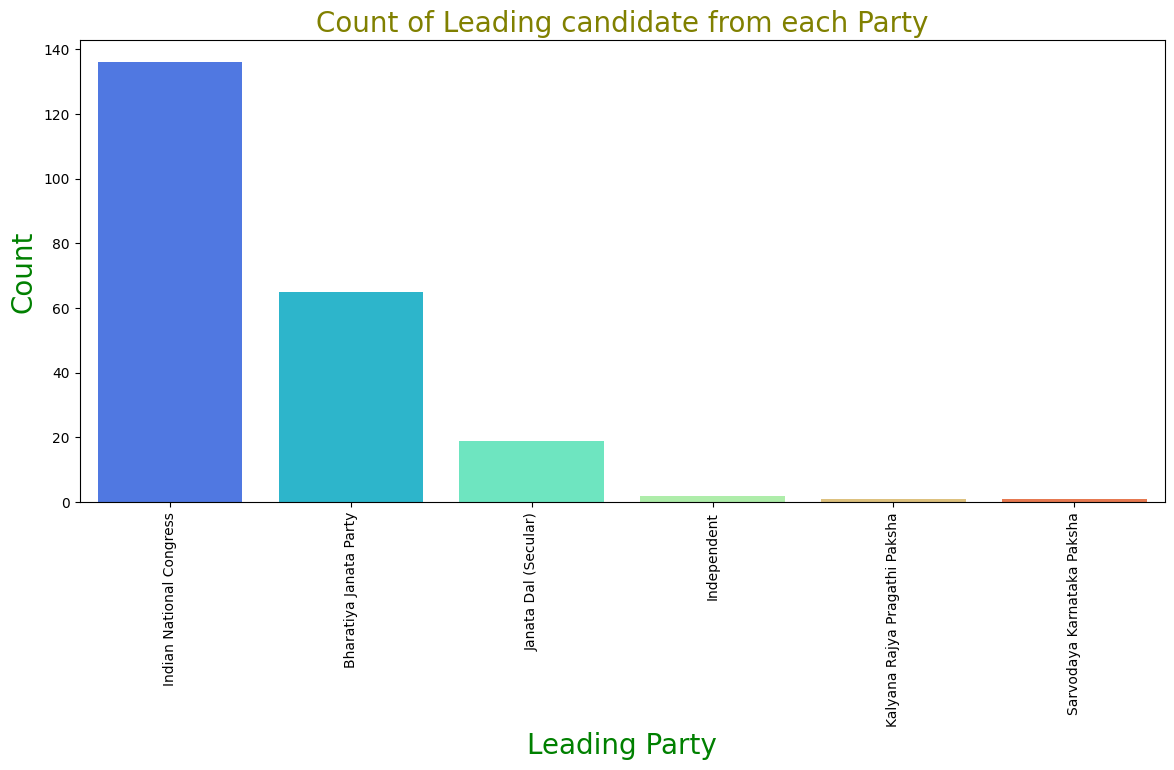

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='Leading Party',order=df['Leading Party'].value_counts().index, palette='rainbow')
plt.xticks(rotation=90)

plt.xlabel('Leading Party',color='green', size=20)
plt.ylabel('Count',color='green', size=20)
plt.title('Count of Leading candidate from each Party',color='olive', size=20)

# e) . Count of Leading candidate from each Party using bar plot

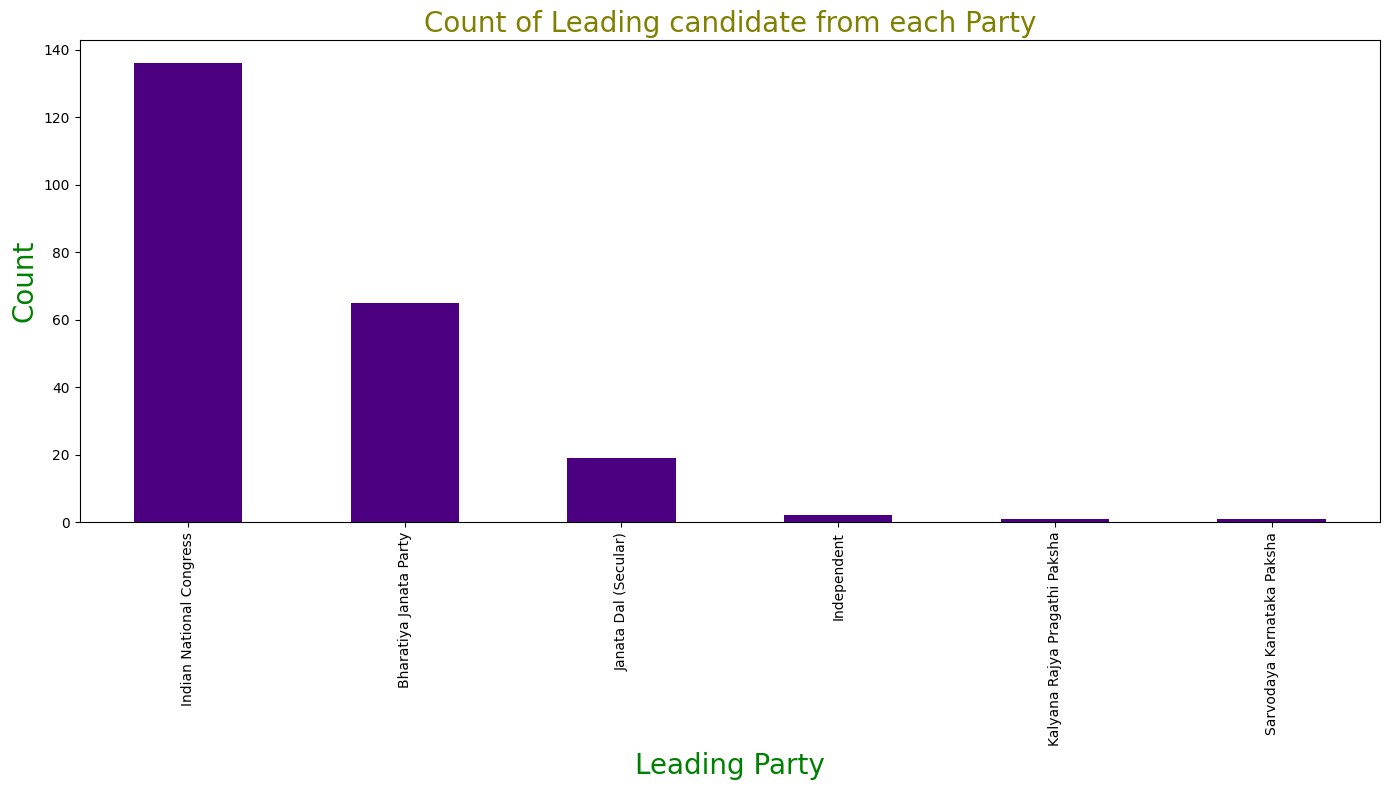

In [15]:
# Count the occurrences of each party
leading_candidate_counts = df['Leading Party'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 8))
leading_candidate_counts.plot(kind='bar', color='indigo')

# Customize the plot
plt.xlabel('Leading Party',color='green', size=20)
plt.ylabel('Count',color='green', size=20)
plt.title('Count of Leading candidate from each Party',color='olive', size=20)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Trailing Party Analysis

# a) . Get unique party from Trailing Party column

In [16]:
df['Trailing Party'].unique()

array(['Independent', 'Bharatiya Janata Party', 'Janata Dal (Secular)',
       'Indian National Congress', 'Kalyana Rajya Pragathi Paksha',
       'Nationalist Congress Party', 'Bahujan Samaj Party'], dtype=object)

# b) . Count no of times a particular party occur in Trailing Party column

In [17]:
df['Trailing Party'].value_counts()

Trailing Party
Bharatiya Janata Party           112
Indian National Congress          65
Janata Dal (Secular)              33
Independent                       11
Kalyana Rajya Pragathi Paksha      1
Nationalist Congress Party         1
Bahujan Samaj Party                1
Name: count, dtype: int64

# c) . Distribution of Trailing candidate by Trailing Party using pie chart

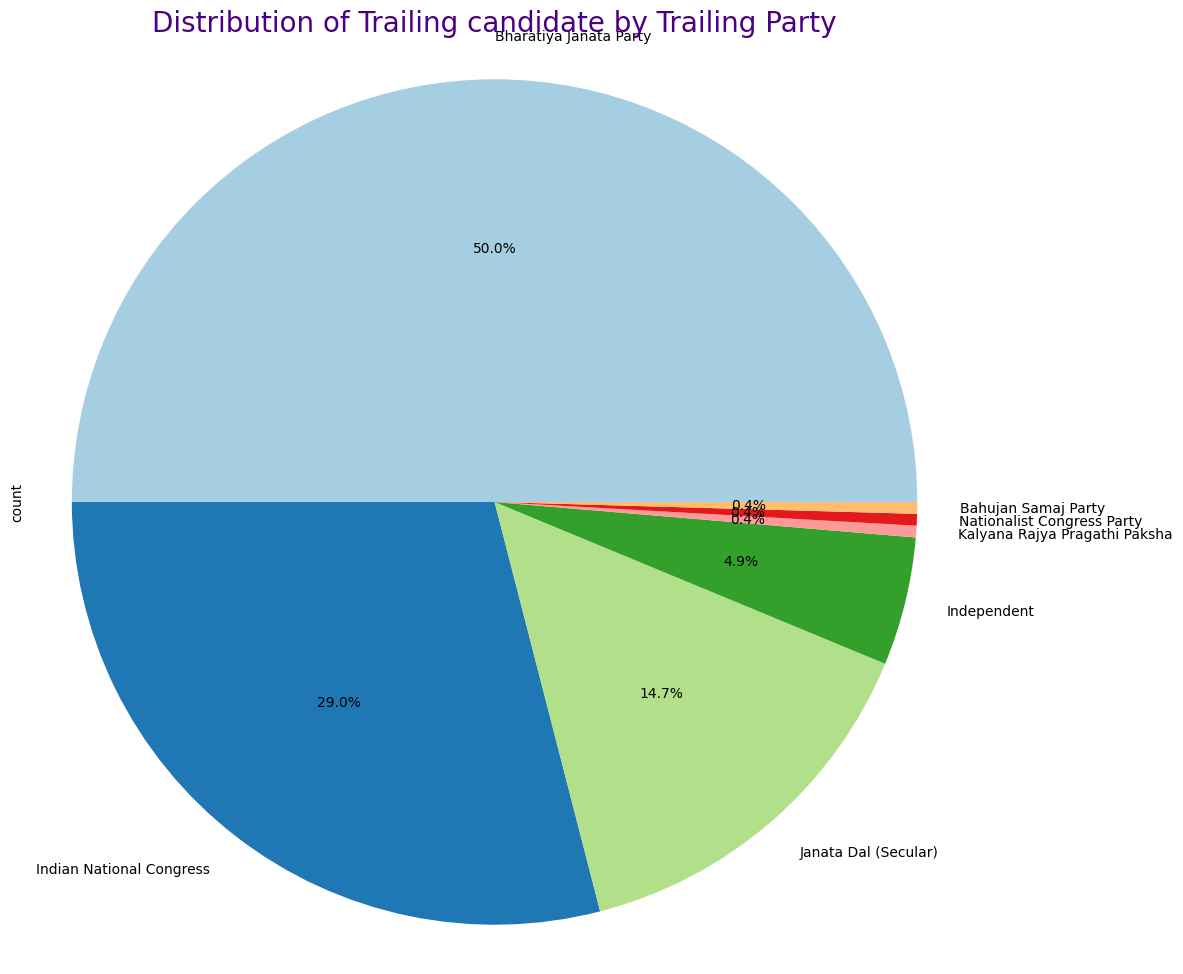

In [18]:
trailing_candidate_distribution_by_leading_party = df['Trailing Party'].value_counts()
plt.figure(figsize=(12,12))
trailing_candidate_distribution_by_leading_party.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of Trailing candidate by Trailing Party',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# d) . Count of Trailing candidate from each Party using countplot (seaborn)

Text(0.5, 1.0, 'Count of Trailing candidate from each Party')

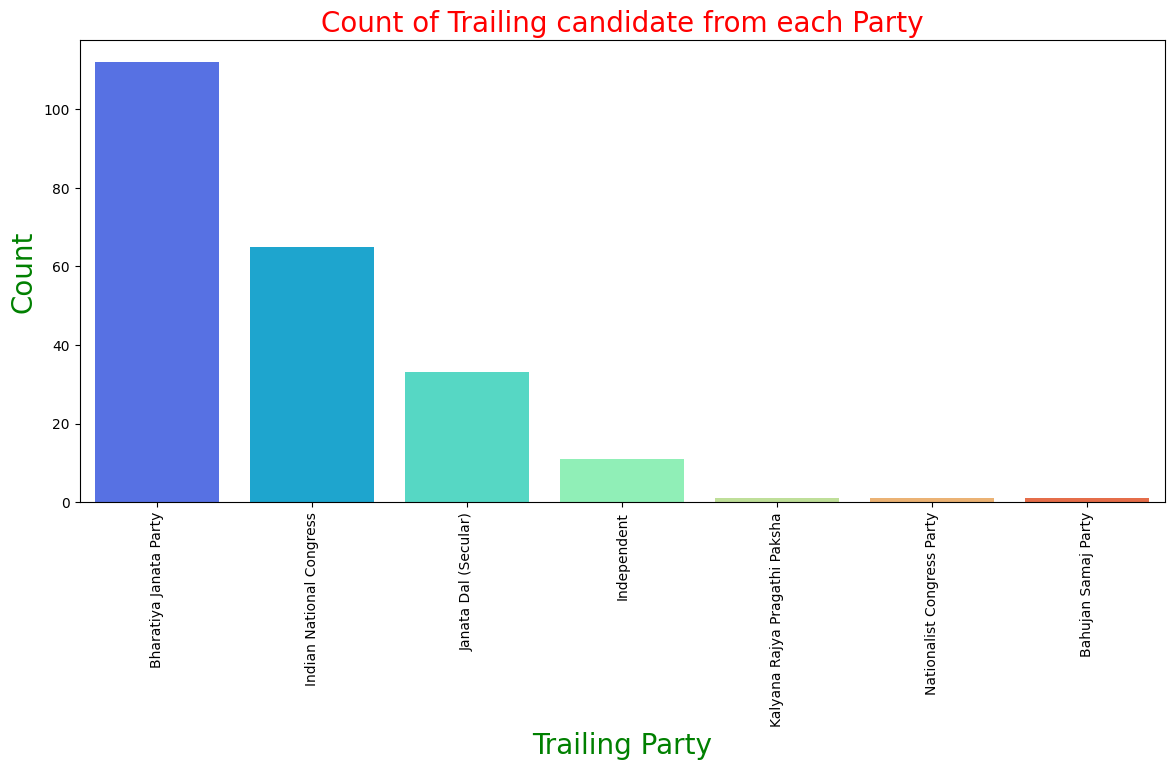

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='Trailing Party',order=df['Trailing Party'].value_counts().index, palette='rainbow')
plt.xticks(rotation=90)

plt.xlabel('Trailing Party',color='green', size=20)
plt.ylabel('Count',color='green', size=20)
plt.title('Count of Trailing candidate from each Party',color='red', size=20)

# e) . Count of Trailing candidate from each Party using bar plot

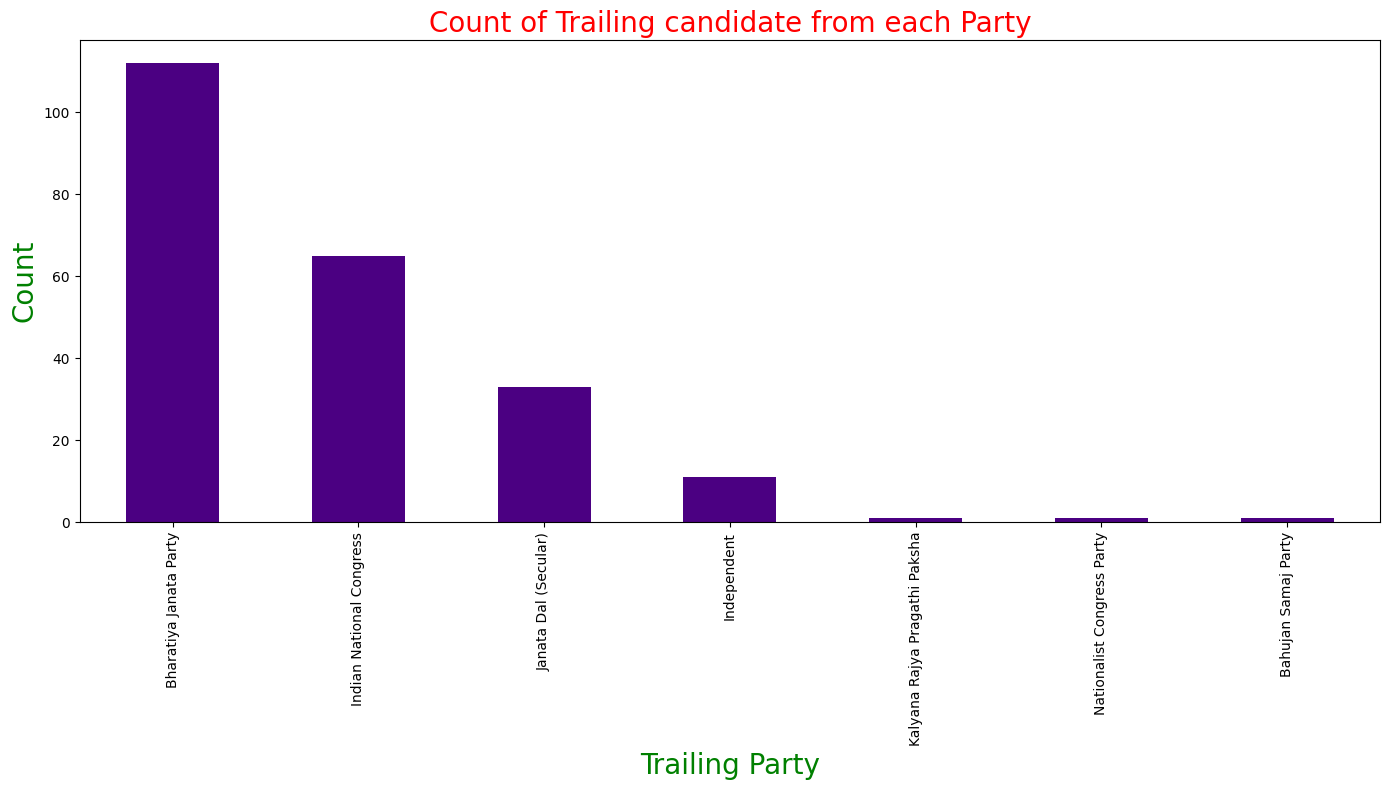

In [20]:
# Count the no of trailing candidate in each party
trailing_candidate_counts = df['Trailing Party'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 8))
trailing_candidate_counts.plot(kind='bar', color='indigo')

# Customize the plot
plt.xlabel('Trailing Party',color='green', size=20)
plt.ylabel('Count',color='green', size=20)
plt.title('Count of Trailing candidate from each Party',color='red', size=20)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
highest_margin_by_leading_party = df[['Leading Party', 'Margin']].sort_values(by='Margin', ascending=False).head(1)
highest_margin_by_leading_party

,Leading Party,Margin
111,Indian National Congress,122392


In [22]:
lowest_margin_by_leading_party = df[['Leading Party', 'Margin']].sort_values(by='Margin', ascending=True).head(1)
lowest_margin_by_leading_party

,Leading Party,Margin
64,Indian National Congress,105


In [23]:
highest_margin_by_trailing_party = df[['Trailing Party', 'Margin']].sort_values(by='Margin', ascending=False).head(1)
highest_margin_by_trailing_party

,Trailing Party,Margin
111,Janata Dal (Secular),122392


In [24]:
lowest_margin_by_trailing_party = df[['Trailing Party', 'Margin']].sort_values(by='Margin', ascending=True).head(1)
lowest_margin_by_trailing_party

,Trailing Party,Margin
64,Bharatiya Janata Party,105


# Partywise Analysis

# 1. Indian National Congress

# a) . INC winning by highest and lowest Margin

In [25]:
df_INC = df[df['Leading Party']=='Indian National Congress']
max_margin = df_INC['Margin'].max()
print(f"Maximum margin won by INC: {max_margin}")
min_margin = df_INC['Margin'].min()
print(f"Minimum margin won by INC: {min_margin}")

Maximum margin won by INC: 122392
Minimum margin won by INC: 105


# b). Get all Leading candidate with Constituency from Indian National Congress 

In [26]:
df_INC = df[df['Leading Party'] == 'Indian National Congress']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_INC.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Indian National Congress")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from INC :",c)         

Indian National Congress
Constituency: Afzalpur
winner :  M.Y.PATIL
Constituency: Aland
winner :  Bhojaraj
Constituency: Anekal
winner :  B. SHIVANNA
Constituency: Arsikere
winner :  K.M. SHIVALINGE GOWDA
Constituency: Athani
winner :  LAXMAN. SANGAPPA. SAVADI
Constituency: B.T.M.Layout
winner :  RAMALINGA REDDY
Constituency: Babaleshwar
winner :  M B PATIL.
Constituency: Badami
winner :  B.B.CHIMMANAKATTI
Constituency: Bagalkot
winner :  METI. HULLAPPA. YAMANAPPA
Constituency: Bagepalli
winner :  S.N. SUBBAREDDY (CHINNAKAYALAPALLI)
Constituency: Bailhongal
winner :  KOUJALAGI. MAHANTESH. SHIVANAND.
Constituency: Bangarapet
winner :  S.N. NARAYANASWAMY. K.M
Constituency: Basavana Bagevadi
winner :  SHIVANAND PATIL
Constituency: Belgaum Rural
winner :  Laxmi R. Hebbalkar
Constituency: Belgaum Uttar
winner :  Asif (Raju) Sait
Constituency: Bellary
winner :  B Nagendra
Constituency: Bellary City
winner :  NARA BHARATH REDDY
Constituency: Bhadravati
winner :  B.K. SANAGAMESHWARA
Constituen

# c). Get all Trailing candidate with Constituency from Indian National Congress

In [27]:
df_INC = df[df['Trailing Party'] == 'Indian National Congress']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_INC.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Indian National Congress")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c=c+1
print("Total No. of Trailing candidates from INC :",c) 

Indian National Congress
Constituency: Aurad
Loser :  BHIMSAIN RAO SHINDE
Constituency: Bangalore South
Loser :  R K Ramesh
Constituency: Bantval
Loser :  B. RAMANATH RAI
Constituency: Basavakalyan
Loser :  VIJAY SINGH
Constituency: Basavanagudi
Loser :  U.B.VENKATESH
Constituency: Belthangady
Loser :  RAKSHITH SHIVARAM
Constituency: Belur
Loser :  B. SHIVARAMU
Constituency: Bidar South
Loser :  ASHOK KHENY
Constituency: Bijapur City
Loser :  ABDUL HAMEED KHAJASAB MUSHARIF
Constituency: Bommanahalli
Loser :  Umapathy Srinivasa Gowda
Constituency: Byndoor
Loser :  K. GOPAL POOJARY
Constituency: C.V. Raman Nagar
Loser :  ANAND KUMAR. S
Constituency: Chamundeshwari
Loser :  S. SIDDEGOWDA
Constituency: Chickpet
Loser :  R. V. DEVRAJ
Constituency: Chincholi
Loser :  SUBHASH V RATHOD
Constituency: Doddaballapur
Loser :  T.VENKATARAMANAIAH (APPAKARANAHALLI T.VENKATESH)
Constituency: Gangawati
Loser :  IQBAL ANSARI
Constituency: Gauribidanur
Loser :  N.H.SHIVASHANKARA REDDY
Constituency: Gokak

# d). Get all Leading candidate from Indian National Congress

In [28]:
df_INC = df[df['Leading Party']=='Indian National Congress']
x = df_INC['Leading Candidate']
c = 0
print('Winnig candidate from INC :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Indian National Congress :",c)

Winnig candidate from INC :
M.Y.PATIL
Bhojaraj
B. SHIVANNA
K.M. SHIVALINGE GOWDA
LAXMAN. SANGAPPA. SAVADI
RAMALINGA REDDY
M B PATIL.
B.B.CHIMMANAKATTI
METI. HULLAPPA. YAMANAPPA
S.N. SUBBAREDDY (CHINNAKAYALAPALLI)
KOUJALAGI. MAHANTESH. SHIVANAND.
S.N. NARAYANASWAMY. K.M
SHIVANAND PATIL
Laxmi R. Hebbalkar
Asif (Raju) Sait
B Nagendra
NARA BHARATH REDDY
B.K. SANAGAMESHWARA
ESHWAR KHANDRE
MANKAL VAIDYA
Rahim Khan
J. T. PATIL.
Basavaraj Neelappa Shivannanavar
KRISHNA BYREGOWDA
T. RAGHUMURTHY
K. HARISH GOWDA
C. Puttarangashetty
B.Z.ZAMEER AHMED KHAN
BASAVARAJU V SHIVAGANGA
PRADEEP ESHWAR
GANESH PRAKASH HUKKERI
H. D. THAMMAIAH
DR. M.C. SUDHAKAR
K.C.VEERENDRA PUPPY
PRIYANK KHARGE
S.S.MALLIKARJUN.
SHAMANUR SHIVASHANKARAPPA
K.H.MUNIYAPPA
VINAY KULKARNI
H. K. PATIL
DINESH GUNDU RAO
PRIYAKRISHNA
S R SRINIVAS (VASU)
ALLAMPRABHU PATIL
KANEEZ FATIMA
H.M.Ganesh Prasad
DESHPANDE RAGHUNATH
MANE SRINIVAS
RUDRAPPA MANAPPA LAMANI
Suresha B S
ANIL CHIKKAMADHU
Ujaneshwar Basavannappa Banakar
D.SUDHAKAR
SHANTH

# 2. Bharatiya Janata Party

# a) . BJP winning by highest and lowest Margin

In [29]:
df_bjp = df[df['Leading Party']=='Bharatiya Janata Party']
max_margin = df_bjp['Margin'].max()
print(f"Maximum margin won by BJP: {max_margin}")
min_margin = df_bjp['Margin'].min()
print(f"Minimum margin won by BJP: {min_margin}")

Maximum margin won by BJP: 71540
Minimum margin won by BJP: 676


# b). Get all Leading candidate with Constituency from Bharatiya Janata Party

In [30]:
df_bjp = df[df['Leading Party'] == 'Bharatiya Janata Party']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_bjp.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Bharatiya Janata Party")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from BJP :",c)          

Bharatiya Janata Party
Constituency: Arabhavi
winner :  BALACHANDRA LAXMANRAO JARKIHOLI
Constituency: Aurad
winner :  PRABHU B CHAVAN
Constituency: Bangalore South
winner :  M Krishnappa
Constituency: Bantval
winner :  RAJESH NAIK U
Constituency: Basavakalyan
winner :  SHARANU SALAGAR
Constituency: Basavanagudi
winner :  RAVI SUBRAMANYA L.A.
Constituency: Belgaum Dakshin
winner :  ABHAY PATIL
Constituency: Belthangady
winner :  HARISH POONJA
Constituency: Belur
winner :  H.K. SURESH (HULLALLI SURESH)
Constituency: Bidar South
winner :  DR. SHAILENDRA BELDALE
Constituency: Bijapur City
winner :  BASANAGOUDA R PATIL (YATNAL)
Constituency: Bommanahalli
winner :  SATHISH REDDY .M
Constituency: Byndoor
winner :  GURURAJ SHETTY GANTIHOLE
Constituency: C.V. Raman Nagar
winner :  S. RAGHU
Constituency: Chickpet
winner :  UDAY B. GARUDACHAR
Constituency: Chincholi
winner :  AVINASH UMESH JADHAV
Constituency: Dasarahalli
winner :  S. MUNIRAJU
Constituency: Doddaballapur
winner :  DHEERAJ MUNIRAJ

# c). Get all Trailing candidate with Constituency from Bharatiya Janata Party

In [31]:
df_bjp = df[df['Trailing Party'] == 'Bharatiya Janata Party']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_bjp.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Bharatiya Janata Party")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c=c+1
print("Total No. of Trailing candidates from BJP :",c)        

Bharatiya Janata Party
Constituency: Aland
Loser :  Subhash Guttedar
Constituency: Anekal
Loser :  SRINIVAS. C. HULLAHALLI
Constituency: Athani
Loser :  MAHESH. IRANGOUDA. KUMATHALLI.
Constituency: B.T.M.Layout
Loser :  K.R.SRIDHARA
Constituency: Babaleshwar
Loser :  VIJAYAKUMAR (VIJAYAGOUDA) PATIL
Constituency: Badami
Loser :  SHANTHAGOUDA THIRTHGOUDA PATIL.
Constituency: Bagalkot
Loser :  VEERABHADRAYYA (VEERANNA) CHARANTIMATH
Constituency: Bagepalli
Loser :  C. MUNIRAJU
Constituency: Bailhongal
Loser :  JAGDISH CHANNAPPA METGUD
Constituency: Basavana Bagevadi
Loser :  BELLUBBI SANGAPPA KALLAPPA
Constituency: Belgaum Rural
Loser :  Nagesh Annappa Manolkar
Constituency: Belgaum Uttar
Loser :  DR. RAVI B. PATIL
Constituency: Bellary
Loser :  B Sreeramulu
Constituency: Bhalki
Loser :  PRAKASH KHANDRE
Constituency: Bhatkal
Loser :  SUNIL B. NAIK
Constituency: Bilgi
Loser :  NIRANI MURAGESH RUDRAPPA
Constituency: Byadgi
Loser :  Ballari Virupakshappa Rudrappa
Constituency: Byatarayanapura

# d). Get all Leading candidate from Bharatiya Janata Party

In [32]:
df_bjp = df[df['Leading Party']=='Bharatiya Janata Party']
x = df_bjp['Leading Candidate']
c = 0
print('Winnig candidate from BJP :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Bharatiya Janata Party :",c)

Winnig candidate from BJP :
BALACHANDRA LAXMANRAO JARKIHOLI
PRABHU B CHAVAN
M Krishnappa
RAJESH NAIK U
SHARANU SALAGAR
RAVI SUBRAMANYA L.A.
ABHAY PATIL
HARISH POONJA
H.K. SURESH (HULLALLI SURESH)
DR. SHAILENDRA BELDALE
BASANAGOUDA R PATIL (YATNAL)
SATHISH REDDY .M
GURURAJ SHETTY GANTIHOLE
S. RAGHU
UDAY B. GARUDACHAR
AVINASH UMESH JADHAV
S. MUNIRAJU
DHEERAJ MUNIRAJ
JARKIHOLI RAMESH LAXMANRAO
BASAWARAJ MATTIMUDU
KRISHNA NAYAKA.
B P HARISH
M.CHANDRAPPA
SIDDU PATIL
MAHESH TENGINAKAI
ARVIND BELLAD
KATTI NIKHIL UMESH
JAGADEESH SHIVAYYA GUDAGUNTI
B. A. BASAVARAJA
GURME SURESH SHETTY
V SUNILL KUMAR
Vithal Somanna Halagekar
T.S. SRIVATHSA
DINAKAR KESHAV SHETTY
A KIRAN KUMAR KODGI
M R PATIL
DODDANAGOUDA HANAMAGOUDA PATIL
MANAPPA D VAJJAL
MANJULA S
K. GOPALAIAH
DR ASHWATH NARAYAN C N
BHARATH SHETTY. Y.
D.VEDAVYASA KAMATH
UMANATHA KOTIAN
C. C. PATIl
JOLLE SHASHIKALA ANNASAHEB
R. ASHOKA
Dr. Shivaraj Patil
S.SURESH KUMAR
MUNIRATHNA
AIHOLE DURYODHAN MAHALINGAPPA
CEMENT MANJU
BASAVARAJ BOMMAI
VIJAYEND

# 3. Janata Dal (Secular)

# a) . JDS winning by highest and lowest Margin

In [33]:
df_jds = df[df['Leading Party']=='Janata Dal (Secular)']
max_margin = df_jds['Margin'].max()
print(f"Maximum margin won by JDS: {max_margin}")
min_margin = df_jds['Margin'].min()
print(f"Minimum margin won by JDS: {min_margin}")

Maximum margin won by JDS: 34256
Minimum margin won by JDS: 2412


# b). Get all Leading candidate with Constituency from Janata Dal (Secular)

In [34]:
df_jds = df[df['Leading Party'] == 'Janata Dal (Secular)']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_jds.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
# Print all the leading candidates from JDS
print("Janata Dal (Secular)")
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from JDS :",c)          

Janata Dal (Secular)
Constituency: Arkalgud
winner :  A. MANJU
Constituency: Chamundeshwari
winner :  G. T. DEVEGOWDA
Constituency: Channapatna
winner :  H.D. KUMARASWAMY
Constituency: Chikkanayakanahalli
winner :  C B SURESH BAABU
Constituency: Devadurga
winner :  Karemma
Constituency: Devar Hippargi
winner :  BHIMANAGOUDA (RAJUGOUDA) BASANAGOUDA PATIL
Constituency: Gurmitkal
winner :  SHARANA GOWDA KANDAKUR
Constituency: Hagaribommanahalli
winner :  Nemarajanaik.K
Constituency: Hanur
winner :  M.R. MANJUNATH
Constituency: Hassan
winner :  Swaroop Prakash
Constituency: Holenarasipur
winner :  H.D. REVANNA
Constituency: Hunsur
winner :  G.D. HARISH GOWDA
Constituency: Krishnarajpet
winner :  H.T.MANJU
Constituency: Mulbagal
winner :  SAMRUDDHI V. MANJUNATH
Constituency: Shimoga Rural
winner :  SHARADA PURYANAIK
Constituency: Shravanabelagola
winner :  C.N. BALAKRISHNA
Constituency: Sidlaghatta
winner :  B.N. RAVI KUMAR
Constituency: Srinivaspur
winner :  G.K. VENKATASHIVAREDDY
Constitu

# c). Get all Trailing candidate with Constituency from Janata Dal (Secular)

In [35]:
df_jds = df[df['Trailing Party'] == 'Janata Dal (Secular)']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_jds.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Janata Dal (Secular)")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c=c+1
print("Total No. of Trailing candidates from JDS :",c)          

Janata Dal (Secular)
Constituency: Arsikere
Loser :  N.R. SANTHOSH
Constituency: Bangarapet
Loser :  M. Mallesh Babu
Constituency: Bhadravati
Loser :  SHARADA APPAJI
Constituency: Bidar
Loser :  SURYAKANTH NAGAMARPALLI
Constituency: Challakere
Loser :  RAVISH KUMAR.M
Constituency: Chintamani
Loser :  J.K. KRISHNA REDDY
Constituency: Dasarahalli
Loser :  R. MANJUNATHA
Constituency: Devanahalli
Loser :  NISARGA NARAYANASWAMY L.N
Constituency: Indi
Loser :  B. D. PATIL (HANJAGI)
Constituency: Jevargi
Loser :  DODDAPPAGOUDA
Constituency: Kanakapura
Loser :  B NAGARAJU
Constituency: Kolar
Loser :  C.M.R. SRINATH
Constituency: Koratagere
Loser :  P. R. SUDHAKAR LAL
Constituency: Krishnarajanagara
Loser :  SA.RA. MAHESH.
Constituency: Kumta
Loser :  SURAJ NAIK SONI
Constituency: Maddur
Loser :  D.C.THAMMANNA
Constituency: Madhugiri
Loser :  M.V.VEERABHADRAIAH
Constituency: Magadi
Loser :  A. MANJUNATH.
Constituency: Malavalli
Loser :  Dr|| K. Annadani
Constituency: Mandya
Loser :  B.R. RAMACH

# d). Get all Leading candidate from Janata Dal (Secular)

In [36]:
df_jds = df[df['Leading Party']=='Janata Dal (Secular)']
x = df_jds['Leading Candidate']
c = 0
print('winnig candidate from JDS :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Janata Dal (Secular) :",c) 

winnig candidate from JDS :
A. MANJU
G. T. DEVEGOWDA
H.D. KUMARASWAMY
C B SURESH BAABU
Karemma
BHIMANAGOUDA (RAJUGOUDA) BASANAGOUDA PATIL
SHARANA GOWDA KANDAKUR
Nemarajanaik.K
M.R. MANJUNATH
Swaroop Prakash
H.D. REVANNA
G.D. HARISH GOWDA
H.T.MANJU
SAMRUDDHI V. MANJUNATH
SHARADA PURYANAIK
C.N. BALAKRISHNA
B.N. RAVI KUMAR
G.K. VENKATASHIVAREDDY
M.T.KRISHNAPPA
Total winnig candidate from Janata Dal (Secular) : 19


# 4. Kalyana Rajya Pragathi Paksha

# a) . Kalyana Rajya Pragathi Paksha winning by highest and lowest Margin

In [37]:
df_krpp = df[df['Leading Party']=='Kalyana Rajya Pragathi Paksha']
max_margin = df_krpp['Margin'].max()
print(f"Maximum margin won by KRPP: {max_margin}")
min_margin = df_krpp['Margin'].min()
print(f"Minimum margin won by KRPP: {min_margin}")

Maximum margin won by KRPP: 8266
Minimum margin won by KRPP: 8266


# b). Get all Leading candidate with Constituency from Kalyana Rajya Pragathi Paksha

In [38]:
df_krpp = df[df['Leading Party'] == 'Kalyana Rajya Pragathi Paksha']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_krpp.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Kalyana Rajya Pragathi Paksha")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from KRPP :",c)          

Kalyana Rajya Pragathi Paksha
Constituency: Gangawati
winner :  G JANARDHAN REDDY
Total No. of Leading candidates from KRPP : 1


# c). Get all Trailing candidate with Constituency from Kalyana Rajya Pragathi Paksha

In [39]:
df_krpp = df[df['Trailing Party'] == 'Kalyana Rajya Pragathi Paksha']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_krpp.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Kalyana Rajya Pragathi Paksha")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c+=1
print("Total No. of Trailing candidates from KRPP :",c)          

Kalyana Rajya Pragathi Paksha
Constituency: Bellary City
Loser :  GALI LAKSHMI ARUNA
Total No. of Trailing candidates from KRPP : 1


# d). Get all Leading candidate from Kalyana Rajya Pragathi Paksha

In [40]:
df_krpp = df[df['Leading Party']=='Kalyana Rajya Pragathi Paksha']
x = df_krpp['Leading Candidate']
c = 0
print('winnig candidate from KRPP :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Kalyana Rajya Pragathi Paksha :",c) 

winnig candidate from KRPP :
G JANARDHAN REDDY
Total winnig candidate from Kalyana Rajya Pragathi Paksha : 1


# 5. Sarvodaya Karnataka Paksha

# a). Sarvodaya Karnataka Paksha winning by highest and lowest Margin

In [41]:
df_skp = df[df['Leading Party']=='Sarvodaya Karnataka Paksha']
max_margin = df_skp['Margin'].max()
print(f"Maximum margin won by SKP: {max_margin}")
min_margin = df_skp['Margin'].min()
print(f"Minimum margin won by SKP: {min_margin}")

Maximum margin won by SKP: 10862
Minimum margin won by SKP: 10862


# b). Get all Leading candidate with Constituency from Sarvodaya Karnataka Paksha

In [42]:
df_skp = df[df['Leading Party'] == 'Sarvodaya Karnataka Paksha']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_skp.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Sarvodaya Karnataka Paksha")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from SKP :",c)          

Sarvodaya Karnataka Paksha
Constituency: Melukote
winner :  DHARSHAN PUTTANNAIAH
Total No. of Leading candidates from SKP : 1


# c). Get all Trailing candidate with Constituency from Sarvodaya Karnataka Paksha

In [43]:
df_skp = df[df['Trailing Party'] == 'Sarvodaya Karnataka Paksha']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_skp.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Sarvodaya Karnataka Paksha")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c+=1
print("Total No. of Trailing candidates from SKP :",c)          

Sarvodaya Karnataka Paksha
Total No. of Trailing candidates from SKP : 0


# d). Get all Leading candidate from Sarvodaya Karnataka Paksha

In [44]:
df_skp = df[df['Leading Party']=='Sarvodaya Karnataka Paksha']
x = df_skp['Leading Candidate']
c = 0
print('winnig candidate from SKP :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Sarvodaya Karnataka Paksha :",c) 

winnig candidate from SKP :
DHARSHAN PUTTANNAIAH
Total winnig candidate from Sarvodaya Karnataka Paksha : 1


# 6. Independaent Candidate 

# a). Independaent Candidate winning by highest and lowest Margin

In [45]:
df_IC = df[df['Leading Party']=='Independent']
max_margin = df_IC['Margin'].max()
print(f"Maximum margin won by IC: {max_margin}")
min_margin = df_IC['Margin'].min()
print(f"Minimum margin won by IC: {min_margin}")

Maximum margin won by IC: 37286
Minimum margin won by IC: 13845


# b). Get all Leading candidate with Constituency from Independent 

In [46]:
df_IC = df[df['Leading Party'] == 'Independent']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_IC.groupby('Constituency')['Leading Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Independaent Candidate")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Leading Candidate']:
        print(f"winner :  {candidate}")
        c+=1
print("Total No. of Leading candidates from Independent :",c)          

Independaent Candidate
Constituency: Gauribidanur
winner :  K.H.PUTTASWAMY GOWDA (KHP)
Constituency: Harapanahalli
winner :  LATHA MALLIKARJUN
Total No. of Leading candidates from Independent : 2


# c). Get all Trailing candidate with Constituency from Independent

In [47]:
df_IC = df[df['Trailing Party'] == 'Independent']

# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df_IC.groupby('Constituency')['Trailing Candidate'].apply(lambda x: x.tolist()).reset_index()

c=0
print("Independent Candidate")
# Print all the leading candidates from KRPP
for index, row in constituency_candidates.iterrows():
    print(f"Constituency: {row['Constituency']}")
    for candidate in row['Trailing Candidate']:
        print(f"Loser :  {candidate}")
        c+=1
print("Total No. of Trailing candidates from Independent :",c)          

Independent Candidate
Constituency: Afzalpur
Loser :  NITIN VENKAYYA GUTTEDAR
Constituency: Arabhavi
Loser :  BHIMAPPA GUNDAPPA GADAD
Constituency: Arkalgud
Loser :  M.T. KRISHNEGOWDA
Constituency: Belgaum Dakshin
Loser :  RAMAKANT KONDUSKAR
Constituency: Channagiri
Loser :  MADAL MALLIKARJUNA
Constituency: Mayakonda
Loser :  B.M. PUSHPA VAGEESHASWAMY
Constituency: Puttur
Loser :  ARUN KUMAR PUTHILA
Constituency: Raybag
Loser :  SHAMBHU KALLOLIKAR
Constituency: Shikaripura
Loser :  S. P. NAGARAJAGOWDA
Constituency: Shirahatti
Loser :  RAMAKRISHNA. SHIDLINGAPPA. DODDAMANI
Constituency: Sidlaghatta
Loser :  PUTTU ANJINAPPA
Total No. of Trailing candidates from Independent : 11


# d). Get all Leading candidate from Independent

In [48]:
df_IC = df[df['Leading Party']=='Independent']
x = df_IC['Leading Candidate']
c = 0
print('winnig candidate from IC :')
for candidate in x:
    c=c+1     
    print(candidate)
print("Total winnig candidate from Independent :",c) 

winnig candidate from IC :
K.H.PUTTASWAMY GOWDA (KHP)
LATHA MALLIKARJUN
Total winnig candidate from Independent : 2


# Group by 'Leading Party' and get leading candidate and then Print the result for each Party

In [49]:
# Group by 'Leading Party' and get leading candidate
grouped_leading_party = df.groupby('Leading Party')
leading_candidate_by_party = grouped_leading_party['Leading Candidate'].unique()

# Print the result
x=0
for party, leading_candidate in leading_candidate_by_party.items():
    print(f'Party: {party}')
    c=0
    print('Winning candidate :')
    for candidate in leading_candidate:
        print(candidate)
        c+=1 
        x+=1
    print(f'Total No. of Winning candidate from {party} :',c)  
    print() 
print(f'Total No. of Winning candidate :',x)

Party: Bharatiya Janata Party
Winning candidate :
BALACHANDRA LAXMANRAO JARKIHOLI
PRABHU B CHAVAN
M Krishnappa
RAJESH NAIK U
SHARANU SALAGAR
RAVI SUBRAMANYA L.A.
ABHAY PATIL
HARISH POONJA
H.K. SURESH (HULLALLI SURESH)
DR. SHAILENDRA BELDALE
BASANAGOUDA R PATIL (YATNAL)
SATHISH REDDY .M
GURURAJ SHETTY GANTIHOLE
S. RAGHU
UDAY B. GARUDACHAR
AVINASH UMESH JADHAV
S. MUNIRAJU
DHEERAJ MUNIRAJ
JARKIHOLI RAMESH LAXMANRAO
BASAWARAJ MATTIMUDU
KRISHNA NAYAKA.
B P HARISH
M.CHANDRAPPA
SIDDU PATIL
MAHESH TENGINAKAI
ARVIND BELLAD
KATTI NIKHIL UMESH
JAGADEESH SHIVAYYA GUDAGUNTI
B. A. BASAVARAJA
GURME SURESH SHETTY
V SUNILL KUMAR
Vithal Somanna Halagekar
T.S. SRIVATHSA
DINAKAR KESHAV SHETTY
A KIRAN KUMAR KODGI
M R PATIL
DODDANAGOUDA HANAMAGOUDA PATIL
MANAPPA D VAJJAL
MANJULA S
K. GOPALAIAH
DR ASHWATH NARAYAN C N
BHARATH SHETTY. Y.
D.VEDAVYASA KAMATH
UMANATHA KOTIAN
C. C. PATIl
JOLLE SHASHIKALA ANNASAHEB
R. ASHOKA
Dr. Shivaraj Patil
S.SURESH KUMAR
MUNIRATHNA
AIHOLE DURYODHAN MAHALINGAPPA
CEMENT MANJU
BAS

# Pivot the data to have separate columns for 'Leading Party' and 'Leading Candidate'

In [50]:
# Pivot the data to have separate columns for 'Leading Candidate' and 'Leading Party'
constituency_candidates = df.pivot_table(index='Constituency', columns='Leading Party', values='Leading Candidate', aggfunc='first').reset_index()

# Rename the columns for clarity
constituency_candidates.columns.name = None  # Remove the leading Party column name
constituency_candidates = constituency_candidates.rename(columns={'Constituency': 'constituency'})

constituency_candidates.head(10)

,constituency,Bharatiya Janata Party,Independent,Indian National Congress,Janata Dal (Secular),Kalyana Rajya Pragathi Paksha,Sarvodaya Karnataka Paksha
0,Afzalpur,NaN,NaN,M.Y.PATIL,NaN,NaN,NaN
1,Aland,NaN,NaN,Bhojaraj,NaN,NaN,NaN
2,Anekal,NaN,NaN,B. SHIVANNA,NaN,NaN,NaN
3,Arabhavi,BALACHANDRA LAXMANRAO JARKIHOLI,NaN,NaN,NaN,NaN,NaN
4,Arkalgud,NaN,NaN,NaN,A. MANJU,NaN,NaN
5,Arsikere,NaN,NaN,K.M. SHIVALINGE GOWDA,NaN,NaN,NaN
6,Athani,NaN,NaN,LAXMAN. SANGAPPA. SAVADI,NaN,NaN,NaN
7,Aurad,PRABHU B CHAVAN,NaN,NaN,NaN,NaN,NaN
8,B.T.M.Layout,NaN,NaN,RAMALINGA REDDY,NaN,NaN,NaN
9,Babaleshwar,NaN,NaN,M B PATIL.,NaN,NaN,NaN


# Group the data by 'Constituency' and collect leading candidates, Leading Party, Margin in the form of list of list

In [51]:
# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df.groupby('Constituency')[['Leading Candidate','Leading Party','Margin']].apply(lambda x: x.values.tolist()).reset_index()

constituency_candidates.head(10)

,Constituency,0
0,Afzalpur,"[[M.Y.PATIL, Indian National Congress, 4594]]"
1,Aland,"[[Bhojaraj, Indian National Congress, 10348]]"
2,Anekal,"[[B. SHIVANNA, Indian National Congress, 31325]]"
3,Arabhavi,"[[BALACHANDRA LAXMANRAO JARKIHOLI, Bharatiya J..."
4,Arkalgud,"[[A. MANJU, Janata Dal (Secular), 19605]]"
5,Arsikere,"[[K.M. SHIVALINGE GOWDA, Indian National Congr..."
6,Athani,"[[LAXMAN. SANGAPPA. SAVADI, Indian National Co..."
7,Aurad,"[[PRABHU B CHAVAN, Bharatiya Janata Party, 9569]]"
8,B.T.M.Layout,"[[RAMALINGA REDDY, Indian National Congress, 9..."
9,Babaleshwar,"[[M B PATIL., Indian National Congress, 15216]]"


# Group the data by 'Constituency' and collect Trailing Candidate, Trailing Party, Margin in the form of list of list

In [52]:
# Group the data by 'Constituency' and collect leading candidates
constituency_candidates = df.groupby('Constituency',)[['Trailing Candidate','Trailing Party','Margin']].apply(lambda x: x.values.tolist()).reset_index()

constituency_candidates.head(10)

,Constituency,0
0,Afzalpur,"[[NITIN VENKAYYA GUTTEDAR, Independent, 4594]]"
1,Aland,"[[Subhash Guttedar, Bharatiya Janata Party, 10..."
2,Anekal,"[[SRINIVAS. C. HULLAHALLI, Bharatiya Janata Pa..."
3,Arabhavi,"[[BHIMAPPA GUNDAPPA GADAD, Independent, 71540]]"
4,Arkalgud,"[[M.T. KRISHNEGOWDA, Independent, 19605]]"
5,Arsikere,"[[N.R. SANTHOSH, Janata Dal (Secular), 20177]]"
6,Athani,"[[MAHESH. IRANGOUDA. KUMATHALLI., Bharatiya Ja..."
7,Aurad,"[[BHIMSAIN RAO SHINDE, Indian National Congres..."
8,B.T.M.Layout,"[[K.R.SRIDHARA, Bharatiya Janata Party, 9222]]"
9,Babaleshwar,"[[VIJAYAKUMAR (VIJAYAGOUDA) PATIL, Bharatiya J..."


# Group the df_bjp by 'Constituency' and collect leading candidates from BJP

In [53]:
# Group the data by 'Constituency' and collect leading candidates
df_bjp = df[df['Leading Party']=='Bharatiya Janata Party']
constituency_candidates = df_bjp.groupby('Constituency')[['Leading Candidate','Margin']].apply(lambda x: x.values.tolist()).reset_index()

constituency_candidates.head(10)

,Constituency,0
0,Arabhavi,"[[BALACHANDRA LAXMANRAO JARKIHOLI, 71540]]"
1,Aurad,"[[PRABHU B CHAVAN, 9569]]"
2,Bangalore South,"[[M Krishnappa, 49699]]"
3,Bantval,"[[RAJESH NAIK U, 8282]]"
4,Basavakalyan,"[[SHARANU SALAGAR, 14415]]"
5,Basavanagudi,"[[RAVI SUBRAMANYA L.A., 54978]]"
6,Belgaum Dakshin,"[[ABHAY PATIL, 12308]]"
7,Belthangady,"[[HARISH POONJA, 18216]]"
8,Belur,"[[H.K. SURESH (HULLALLI SURESH), 7736]]"
9,Bidar South,"[[DR. SHAILENDRA BELDALE, 1263]]"


# Group the df_INC by 'Constituency' and collect leading candidates from INC

In [54]:
# Group the data by 'Constituency' and collect leading candidates
df_INC = df[df['Leading Party']=='Indian National Congress']
constituency_candidates = df_INC.groupby('Constituency')[['Leading Candidate','Margin']].apply(lambda x: x.values.tolist()).reset_index()

constituency_candidates.head(10)

,Constituency,0
0,Afzalpur,"[[M.Y.PATIL, 4594]]"
1,Aland,"[[Bhojaraj, 10348]]"
2,Anekal,"[[B. SHIVANNA, 31325]]"
3,Arsikere,"[[K.M. SHIVALINGE GOWDA, 20177]]"
4,Athani,"[[LAXMAN. SANGAPPA. SAVADI, 76122]]"
5,B.T.M.Layout,"[[RAMALINGA REDDY, 9222]]"
6,Babaleshwar,"[[M B PATIL., 15216]]"
7,Badami,"[[B.B.CHIMMANAKATTI, 9725]]"
8,Bagalkot,"[[METI. HULLAPPA. YAMANAPPA, 5878]]"
9,Bagepalli,"[[S.N. SUBBAREDDY (CHINNAKAYALAPALLI), 19179]]"
